In [1]:
# -------------------------- LIBRARIES NECESSARY IN THIS PROJECT  -------------------------- #

import pandas as pd
import numpy as np
import seaborn as sns
from datetime import *
import zipfile
import pylab as plt

# -------------------------- FUNCTIONS -------------------------- #

def getDataSet(data_path):
    return pd.read_csv(data_path)

def plotNaNValuesColums(dataSet):
    # Gets the dataSet Columns with null values
    #  and the Percentual of null values per column    
    missing_values = (dataSet.isnull().sum() / len(dataSet)) * 100    
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)   

    missing_values = missing_values.to_frame()
    missing_values.columns = ['Percentual']
    missing_values.index.names = ['Name']
    missing_values['Column'] = missing_values.index

    # Plots the graph
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Column', y = 'Percentual', data=missing_values)
    plt.xticks(rotation = 90)
    plt.show()
    print(missing_values)
    
def plotNotNaNValuesColums(dataSet):
    # Gets the dataSet Columns with null values
    #  and the Percentual of null values per column    
    missing_values = (dataSet.notnull().sum() / len(dataSet)) * 100    
    missing_values = missing_values[missing_values > 0]
    missing_values.sort_values(inplace=True)   

    missing_values = missing_values.to_frame()
    missing_values.columns = ['Percentual']
    missing_values.index.names = ['Name']
    missing_values['Column'] = missing_values.index

    # Plots the graph
    sns.set(style="whitegrid", color_codes=True)
    sns.barplot(x = 'Column', y = 'Percentual', data=missing_values)
    plt.xticks(rotation = 90)
    plt.show()
    print(missing_values)

def sigmoid(x):
     return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    ds = s*(1-s)
    return ds    

## Upload dataSets

In [2]:
# -------------------------- PATH OF THE DATASETS USED IN THE PROJECT  -------------------------- #
zf = zipfile.ZipFile('dataSets.zip')

invoices_claims_last_actived_all_fields = pd.read_csv(zf.open('Invoices_Claims_Last_Actived.csv'))
invoices_claims_last_completed_all_fields = pd.read_csv(zf.open('Invoices_Claims_Last_Completed.csv'))
plans_budgets_all_fields = pd.read_csv(zf.open('Plans_Budgets.csv'))
members_supported_all_fields = pd.read_csv(zf.open('Members_Supported.csv')) 
providers_all_fields = pd.read_csv(zf.open('Providers.csv'))

C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3062: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Data manipulation and cleansing<a name="preparation"></a>

### Members dataset cleasing

In [3]:
# Check the dataSet fields
members_supported_all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               6019 non-null   int64  
 1   member_key       6019 non-null   object 
 2   date_of_birth    6019 non-null   object 
 3   first_name       6019 non-null   object 
 4   last_name        6019 non-null   object 
 5   price_zone_code  6019 non-null   object 
 6   u_disabilities   1272 non-null   object 
 7   u_gender         5304 non-null   object 
 8   SA1              735 non-null    float64
 9   SA2              735 non-null    float64
 10  SA3              735 non-null    float64
 11  SA4              735 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 399.8+ KB


In [4]:
members_supported_all_fields.head(4)

,id,member_key,date_of_birth,first_name,last_name,price_zone_code,u_disabilities,u_gender,SA1,SA2,SA3,SA4
0,1350,f8e1f640-c7f3-11ea-baa6-ebfe92aca975,1957-12-19,Aaron,Edney,Remote,Amputee,Female,NaN,NaN,NaN,NaN
1,435,df6fef80-c179-11ea-8a11-397bdc21f5a9,2002-11-04,Abba,Joskovitch,ACT_NSW_QLD_VIC,NaN,Female,NaN,NaN,NaN,NaN
2,3297,d4762b30-dcef-11ea-a5ac-61abce895864,2013-09-26,Abbe,Claridge,ACT_NSW_QLD_VIC,NaN,Male,NaN,NaN,NaN,NaN
3,3641,e03ed7f0-ddb7-11ea-a31a-7d25e47a5c0a,1969-12-15,Abbe,Kelloway,ACT_NSW_QLD_VIC,Mental health,Female,NaN,NaN,NaN,NaN


In [5]:
# Select just the fields to be used
df_members_supported = members_supported_all_fields[{"id"
                                                   , "member_key" 
                                                   , "first_name"
                                                   , "last_name"
                                                   , "price_zone_code"
                                                   , "u_disabilities"
                                                   , "SA1"
                                                   }]

# Rename some dataSet colums to create a name's pattern
df_members_supported.rename(columns={'id':'member_id'
                                   , 'u_disabilities':'disabilities'
                                    } , inplace = True)                                    

C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


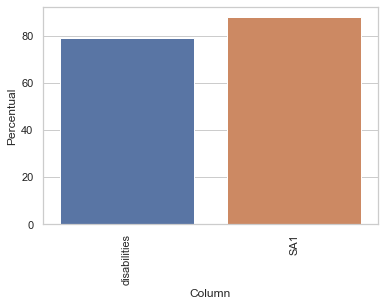

              Percentual        Column
Name                                  
disabilities   78.866921  disabilities
SA1            87.788669           SA1
C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [6]:
# Check if there any NaN Field
plotNaNValuesColums(df_members_supported)

# Although amount of null values in the columns is high they are keeped in the dataSet
#  And it is assigned 'Not Assigned' to the null values in u_disabilities and SA1
df_members_supported.loc[df_members_supported['disabilities'].isnull(),['disabilities']] = "N/A"
df_members_supported.loc[df_members_supported['SA1'].isnull(),['SA1']] = "N/A"

df_members_cleased = df_members_supported

### Plans and budgets dataset cleasing

In [7]:
# Check the dataSet fields
plans_budgets_all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69470 entries, 0 to 69469
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   member_key                69470 non-null  object 
 1   plan_key                  69470 non-null  object 
 2   plan_start_date           69470 non-null  object 
 3   plan_start_date.1         69470 non-null  object 
 4   status                    69470 non-null  object 
 5   id_budget                 69470 non-null  int64  
 6   budget_number             66164 non-null  object 
 7   opening_balance           19824 non-null  float64
 8   closing_balance           19824 non-null  float64
 9   level2_key                69470 non-null  object 
 10  level2_name               69470 non-null  object 
 11  level1_key                69470 non-null  object 
 12  level1_name               69470 non-null  object 
 13  item_category_level3_key  1213 non-null   object 
 14  budget

In [8]:
plans_budgets_all_fields.head(4)

,member_key,plan_key,plan_start_date,plan_start_date.1,status,id_budget,budget_number,opening_balance,closing_balance,level2_key,level2_name,level1_key,level1_name,item_category_level3_key,budget_level3_name,value_allocated_budget,value_remained_budget,status_budget
0,ef0ab4c0-891b-11ea-a119-35e8388a5f49,29b86641-62d2-4eb2-9222-311b16ef74cc,2020-04-24,2021-04-23,PLAN_DELIVERY_ACTIVE,1,55508918,NaN,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,Improved daily living skills,5874551b-f597-11e9-bfb4-022d4762bb3c,Capacity Building,NaN,NaN,8168.00,8168.00,CONFIRMED
1,6a535640-8b5c-11ea-9eec-315ed4b1385b,ea2cc969-6c3f-4dbc-9ebe-30df0c9f5b33,2020-04-20,2021-04-20,PLAN_DELIVERY_ACTIVE,2,55539563,NaN,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,Improved daily living skills,5874551b-f597-11e9-bfb4-022d4762bb3c,Capacity Building,NaN,NaN,7682.04,7682.04,CONFIRMED
2,6a535640-8b5c-11ea-9eec-315ed4b1385b,ea2cc969-6c3f-4dbc-9ebe-30df0c9f5b33,2020-04-20,2021-04-20,PLAN_DELIVERY_ACTIVE,3,55539563,NaN,NaN,7d0af5b1-f597-11e9-bfb4-022d4762bb3c,Consumables,58745466-f597-11e9-bfb4-022d4762bb3c,Core,NaN,NaN,300.00,300.00,CONFIRMED
3,472c17f0-9409-11ea-ba24-1f1ea52ce5bc,dd735ad0-05eb-42ce-91ba-36e1e032a67a,2019-09-11,2020-08-17,COMPLETED,4,55612635,NaN,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,Improved daily living skills,5874551b-f597-11e9-bfb4-022d4762bb3c,Capacity Building,NaN,NaN,6972.41,6972.41,CONFIRMED


In [9]:
# Select just the fields to be used
df_plans_budgets = plans_budgets_all_fields[{"member_key"
                                           , "plan_key"
                                           , "plan_start_date" 
                                           , "plan_start_date.1"
                                           , "status"
                                           , "budget_number"                                              
                                           , "level2_key"
                                           , "level2_name"
                                           , "level1_key"
                                           , "level1_name"
                                           , "item_category_level3_key"
                                           , "budget_level3_name"
                                           , "opening_balance"
                                           , "closing_balance"
                                           , "value_allocated_budget"
                                           , "status_budget"
                                           }]


# Rename some dataSet colums to create a name's pattern
df_plans_budgets.rename(columns={'plan_start_date.1':'plan_end_date'
                               , 'status':'plan_status'                               
                               , 'status_budget':'budget_status'
                               , 'value_allocated_budget':'budget_amount'
                               , 'level2_key':'budget_level2_key'
                               , 'level2_name':'budget_level2_name'
                               , 'level2_display_name':'budget_level2_display_name'
                               , 'level1_key':'budget_level1_key'
                               , 'level1_name':'budget_level1_name'
                               , 'item_category_level3_key':'budget_level3_key'
                               , 'level3_reference_number':'budget_level3_reference_number'
                                } , inplace = True)                            

C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [10]:
# Check the Budget's status in the dataSet
np.unique(df_plans_budgets['budget_status'])

array(['CONFIRMED', 'UNCONFIRMED'], dtype=object)

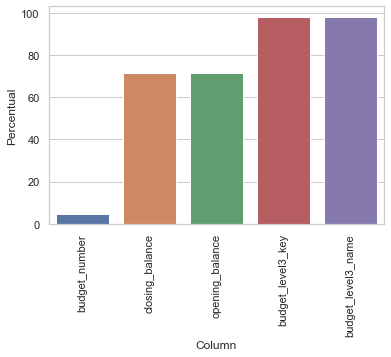

                    Percentual              Column
Name                                              
budget_number         4.758889       budget_number
closing_balance      71.463941     closing_balance
opening_balance      71.463941     opening_balance
budget_level3_key    98.253923   budget_level3_key
budget_level3_name   98.253923  budget_level3_name
None


In [11]:
# Check if there any Nan Field
print(plotNaNValuesColums(df_plans_budgets))

In [12]:
# Check some budget_number NaN Data to
#  Check these data have in commum
#   It is seen that when budget_number is null
#    opening_balance and closing_balance are not null
Null_budget_number = df_plans_budgets.loc[(df_plans_budgets['budget_number'].isna())]
Null_budget_number.head(4)

,budget_level3_key,closing_balance,budget_level2_key,plan_start_date,budget_amount,budget_number,plan_key,plan_status,budget_level2_name,budget_level3_name,member_key,budget_status,plan_end_date,budget_level1_name,opening_balance,budget_level1_key
63,NaN,2833.24,7d0af71b-f597-11e9-bfb4-022d4762bb3c,2020-09-25,9084.16,NaN,b4ebac00-b462-11ea-a898-85942aaecf99,COMPLETED,Assistance with daily living,NaN,b3936f00-b462-11ea-9a7d-99d8a325124d,CONFIRMED,2020-03-23,Core,0.0,58745466-f597-11e9-bfb4-022d4762bb3c
64,NaN,232.74,7d0af5b1-f597-11e9-bfb4-022d4762bb3c,2020-09-25,2720.20,NaN,b4ebac00-b462-11ea-a898-85942aaecf99,COMPLETED,Consumables,NaN,b3936f00-b462-11ea-9a7d-99d8a325124d,CONFIRMED,2020-03-23,Core,0.0,58745466-f597-11e9-bfb4-022d4762bb3c
65,NaN,7760.68,7d0af53b-f597-11e9-bfb4-022d4762bb3c,2020-09-25,23353.72,NaN,b4ebac00-b462-11ea-a898-85942aaecf99,COMPLETED,Assistance with social and community participa...,NaN,b3936f00-b462-11ea-9a7d-99d8a325124d,CONFIRMED,2020-03-23,Core,0.0,58745466-f597-11e9-bfb4-022d4762bb3c
66,NaN,6.25,7d0af57b-f597-11e9-bfb4-022d4762bb3c,2020-09-25,12182.38,NaN,b4ebac00-b462-11ea-a898-85942aaecf99,COMPLETED,Improved daily living skills,NaN,b3936f00-b462-11ea-9a7d-99d8a325124d,CONFIRMED,2020-03-23,Capacity Building,0.0,5874551b-f597-11e9-bfb4-022d4762bb3c


In [13]:
# Check some budget_number Not NaN Data to
#  Check these data have in commum
#   It is seen that when budget_number is null
#    opening_balance and closing_balance are null
Null_budget_number = df_plans_budgets.loc[(df_plans_budgets['budget_number'].notna())]
Null_budget_number.head(4)

,budget_level3_key,closing_balance,budget_level2_key,plan_start_date,budget_amount,budget_number,plan_key,plan_status,budget_level2_name,budget_level3_name,member_key,budget_status,plan_end_date,budget_level1_name,opening_balance,budget_level1_key
0,NaN,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,2020-04-24,8168.00,55508918,29b86641-62d2-4eb2-9222-311b16ef74cc,PLAN_DELIVERY_ACTIVE,Improved daily living skills,NaN,ef0ab4c0-891b-11ea-a119-35e8388a5f49,CONFIRMED,2021-04-23,Capacity Building,NaN,5874551b-f597-11e9-bfb4-022d4762bb3c
1,NaN,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,2020-04-20,7682.04,55539563,ea2cc969-6c3f-4dbc-9ebe-30df0c9f5b33,PLAN_DELIVERY_ACTIVE,Improved daily living skills,NaN,6a535640-8b5c-11ea-9eec-315ed4b1385b,CONFIRMED,2021-04-20,Capacity Building,NaN,5874551b-f597-11e9-bfb4-022d4762bb3c
2,NaN,NaN,7d0af5b1-f597-11e9-bfb4-022d4762bb3c,2020-04-20,300.00,55539563,ea2cc969-6c3f-4dbc-9ebe-30df0c9f5b33,PLAN_DELIVERY_ACTIVE,Consumables,NaN,6a535640-8b5c-11ea-9eec-315ed4b1385b,CONFIRMED,2021-04-20,Core,NaN,58745466-f597-11e9-bfb4-022d4762bb3c
3,NaN,NaN,7d0af57b-f597-11e9-bfb4-022d4762bb3c,2019-09-11,6972.41,55612635,dd735ad0-05eb-42ce-91ba-36e1e032a67a,COMPLETED,Improved daily living skills,NaN,472c17f0-9409-11ea-ba24-1f1ea52ce5bc,CONFIRMED,2020-08-17,Capacity Building,NaN,5874551b-f597-11e9-bfb4-022d4762bb3c


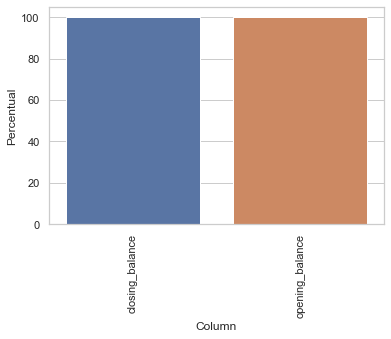

                 Percentual           Column
Name                                        
closing_balance       100.0  closing_balance
opening_balance       100.0  opening_balance


In [14]:
# Plot the percentual of opening_balance and closing_balance not Nan with budget_number Nan
Null_budget_number = df_plans_budgets[{'opening_balance', 'closing_balance'}].loc[(df_plans_budgets['budget_number'].isna())]
plotNotNaNValuesColums(Null_budget_number)

# Deletes the records with budget_number are NaN
#  As They are rows that represents Balance
df_plans_budgets = df_plans_budgets.drop(df_plans_budgets[df_plans_budgets.budget_number.isna()].index)

#  And keeps the ones with level3_reference_number, stated_item_name, level3_key
#   Assigns 'Not Assigned' in columns 'level3_key','level3_reference_number', 'stated_item_name'
#   because if budget_level3_key, level3_key are NaN
#   Means the budget starts in level 2
df_plans_budgets.loc[df_plans_budgets['budget_level3_key'].isnull(),['budget_level3_key', 'budget_level3_name']] = "N/A"

In [15]:
# Check if there is any DateTime column
df_plans_budgets.select_dtypes(include=[np.datetime64]).any().count()

0

In [16]:
df_plans_budgets['plan_start_date'] = pd.to_datetime(df_plans_budgets['plan_start_date']).dt.strftime('%Y-%m-%d')
df_plans_budgets['plan_end_date'] = pd.to_datetime(df_plans_budgets['plan_end_date']).dt.strftime('%Y-%m-%d')

In [17]:
# Group the plans from their bugdets
df_plans_budgets_cleased = df_plans_budgets.groupby(["member_key"
                                                   , "plan_key"
                                                   , "plan_status"
                                                   , "plan_start_date"
                                                   , "plan_end_date"
                                                   , "budget_status"
                                                   , "budget_level3_name"
                                                   , "budget_level3_key" 
                                                   , "budget_level2_key"
                                                   , "budget_level2_name"
                                                   , "budget_level1_key"
                                                   , "budget_level1_name"]).agg({"budget_amount": "sum"}).reset_index()                                                   

### Invoice and claims dataset cleasing

### Invoice and claims dataset From LAST ACTIVED plan

In [18]:
# Check the dataSet fields
invoices_claims_last_actived_all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 446540 entries, 0 to 446539
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   member_id            446540 non-null  int64  
 1   invoice_state        446540 non-null  object 
 2   updated_at           446540 non-null  object 
 3   invoiced_amount      445023 non-null  float64
 4   invoice_id           446540 non-null  int64  
 5   claim_id             446540 non-null  int64  
 6   claim_start_date     446540 non-null  object 
 7   claim_end_date       446540 non-null  object 
 8   claim_state          446540 non-null  object 
 9   claim_funded_amount  439038 non-null  float64
 10  claimed_units        444878 non-null  float64
 11  claimed_unit_price   446258 non-null  float64
 12  key                  446540 non-null  object 
 13  key.1                446540 non-null  object 
 14  key.2                446540 non-null  object 
dtypes: float64(4), in

In [19]:
invoices_claims_last_actived_all_fields.head(4)

,member_id,invoice_state,updated_at,invoiced_amount,invoice_id,claim_id,claim_start_date,claim_end_date,claim_state,claim_funded_amount,claimed_units,claimed_unit_price,key,key.1,key.2
0,53,ALL_PAID,2021-04-06 17:31:25,378.56,955,1212,2020-05-20,2020-05-29,PAID,378.56,7.0,54.08,2d001d39-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
1,53,INVOICE_REJECTED,2021-04-06 17:37:39,378.56,931,1223,2020-06-03,2020-06-12,SCHEME_REJECTED,0.00,7.0,54.08,2d001d39-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
2,53,INVOICE_REJECTED,2021-04-06 17:37:39,65.55,931,1247,2020-05-03,2020-06-12,SCHEME_REJECTED,0.00,69.0,0.95,bf133220-754f-11ea-ade9-022376bbb7c0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
3,53,ALL_PAID,2021-04-06 17:31:25,374.94,955,1251,2020-05-18,2020-05-29,PAID,374.94,6.0,62.49,85e97742-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c


In [20]:
# Select just the fields to be used
invoices_claims_last_actived = invoices_claims_last_actived_all_fields[{"member_id"
                                                                      , "invoice_state"
                                                                      , "invoice_id"
                                                                      , "updated_at"
                                                                      , "claim_state"
                                                                      , "claim_id"
                                                                      , "key"  
                                                                      , "key.1"
                                                                      , "key.2"
                                                                      , "claim_start_date"
                                                                      , "claim_end_date"
                                                                      , "claim_funded_amount"
                                                                      , "invoiced_amount"
                                                                      , "claimed_units"
                                                                      , "claimed_unit_price"
                                                                     }]

# Rename some dataSet colums to create a name's pattern
invoices_claims_last_actived.rename(columns={'claim_funded_amount':'funded_amount'                                           
                                           , 'claimed__units_price':'claimed__units_amount'  
                                           , 'key.1':'claim_level2_key'
                                           , 'key.2':'claim_level1_key'
                                           , 'key':'claim_level3_key'
                                              } , inplace = True)                  

In [21]:
# Check the claim_state To check whether there is any dump value
invoices_claims_last_actived['claim_state'].unique()

array(['PAID', 'SCHEME_REJECTED', 'NOT_CLAIMABLE', 'CANCELLED',
       'PENDING_APPROVAL', 'PENDING_REFUND', 'REFUNDED',
       'OPERATOR_REJECTED', 'MEMBER_REJECTED', 'PENDING_CANCELLATION',
       'PENDING_DISBURSEMENT', 'DRAFT_CLAIM', 'PENDING_REVIEW',
       'SCHEME_AUTHORIZED', 'OPERATOR_AUTHORIZED'], dtype=object)

In [22]:
invoices_claims_last_actived = invoices_claims_last_actived.drop(invoices_claims_last_actived[invoices_claims_last_actived.invoice_state.isna()].index)

In [23]:
# Check the claim_state To check whether there is any dump value
invoices_claims_last_actived['invoice_state'].unique()

array(['ALL_PAID', 'INVOICE_REJECTED', 'SHORT_PAID', 'CANCELLED',
       'PENDING_APPROVAL', 'PART_PAID', 'PENDING_REFUND',
       'FULLY_REFUNDED', 'NOT_CLAIMABLE', 'PARTIALLY_REFUNDED',
       'PENDING_REVIEW', 'PENDING_CANCELLATION', 'PENDING_CLAIM',
       'ALL_APPROVED', 'DEED_ERROR_REVIEW_ALL', 'DRAFT_INVOICE',
       'SHORT_PAYMENT_APPROVED', 'PARTIALLY_APPROVED'], dtype=object)

In [24]:
invoices_claims_last_actived['claim_state'].unique()

array(['PAID', 'SCHEME_REJECTED', 'NOT_CLAIMABLE', 'CANCELLED',
       'PENDING_APPROVAL', 'PENDING_REFUND', 'REFUNDED',
       'OPERATOR_REJECTED', 'MEMBER_REJECTED', 'PENDING_CANCELLATION',
       'PENDING_DISBURSEMENT', 'DRAFT_CLAIM', 'PENDING_REVIEW',
       'SCHEME_AUTHORIZED', 'OPERATOR_AUTHORIZED'], dtype=object)

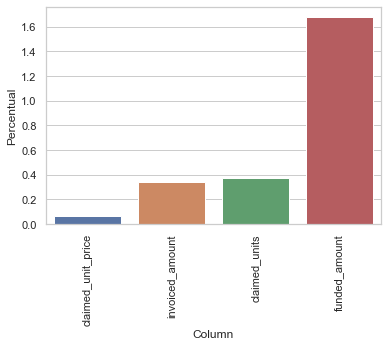

                    Percentual              Column
Name                                              
claimed_unit_price    0.063152  claimed_unit_price
invoiced_amount       0.339723     invoiced_amount
claimed_units         0.372195       claimed_units
funded_amount         1.680029       funded_amount
None


In [25]:
# Check if there any Nan Field
print(plotNaNValuesColums(invoices_claims_last_actived))

In [26]:
# Check some invoiced_amount and invoiced_amount NaN Data to
#  Check these data have in commum
df_invoiced_units_NaN = invoices_claims_last_actived.loc[invoices_claims_last_actived['funded_amount'].isna()]
df_invoiced_units_NaN

,invoiced_amount,claim_start_date,invoice_id,claimed_units,claim_id,claimed_unit_price,claim_end_date,claim_level2_key,claim_state,claim_level1_key,invoice_state,claim_level3_key,updated_at,funded_amount,member_id
560,193.990,2020-07-08,1685,1.0,2660,193.99,2020-07-08,7d0af57b-f597-11e9-bfb4-022d4762bb3c,PENDING_APPROVAL,5874551b-f597-11e9-bfb4-022d4762bb3c,PENDING_APPROVAL,85e9e810-754f-11ea-ade9-022376bbb7c0,2020-07-09 02:08:38,NaN,195
4355,434.400,2020-07-06,19529,8.0,31321,54.30,2020-07-06,7d0af53b-f597-11e9-bfb4-022d4762bb3c,OPERATOR_REJECTED,58745466-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,2d00284b-754f-11ea-ade9-022376bbb7c0,2021-04-06 17:54:18,NaN,600
4356,1500.000,2020-07-07,19529,1.0,31322,1.00,2020-07-07,7d0af71b-f597-11e9-bfb4-022d4762bb3c,OPERATOR_REJECTED,58745466-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,2d0020b4-754f-11ea-ade9-022376bbb7c0,2021-04-06 17:54:18,NaN,600
5218,125.240,2020-07-24,21023,1.0,33762,125.24,2020-07-24,7d0af57b-f597-11e9-bfb4-022d4762bb3c,MEMBER_REJECTED,5874551b-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,85e9e8b9-754f-11ea-ade9-022376bbb7c0,2021-04-06 17:59:32,NaN,846
5493,97.000,2020-07-21,21211,1.0,34039,97.00,2020-07-21,7d0af57b-f597-11e9-bfb4-022d4762bb3c,MEMBER_REJECTED,5874551b-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,85e9e810-754f-11ea-ade9-022376bbb7c0,2021-04-06 18:00:21,NaN,575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
446535,62.025,2020-12-22,539305,0.5,1006084,124.05,2020-12-22,7d0af57b-f597-11e9-bfb4-022d4762bb3c,OPERATOR_AUTHORIZED,5874551b-f597-11e9-bfb4-022d4762bb3c,PENDING_CLAIM,2d006104-754f-11ea-ade9-022376bbb7c0,2021-04-19 09:10:33,NaN,4516
446536,62.025,2020-12-23,539306,0.5,1006085,124.05,2020-12-23,7d0af57b-f597-11e9-bfb4-022d4762bb3c,OPERATOR_AUTHORIZED,5874551b-f597-11e9-bfb4-022d4762bb3c,PENDING_CLAIM,2d006104-754f-11ea-ade9-022376bbb7c0,2021-04-19 09:11:05,NaN,4516
446537,248.100,2020-12-22,539307,2.0,1006086,124.05,2020-12-22,7d0af57b-f597-11e9-bfb4-022d4762bb3c,OPERATOR_AUTHORIZED,5874551b-f597-11e9-bfb4-022d4762bb3c,PENDING_CLAIM,2d006104-754f-11ea-ade9-022376bbb7c0,2021-04-19 09:11:31,NaN,4516
446538,190.000,2021-04-15,539308,1.0,1006087,190.00,2021-04-15,7d0af57b-f597-11e9-bfb4-022d4762bb3c,OPERATOR_AUTHORIZED,5874551b-f597-11e9-bfb4-022d4762bb3c,PENDING_CLAIM,85e9e810-754f-11ea-ade9-022376bbb7c0,2021-04-19 09:12:49,NaN,5433


In [27]:
# Group the state of invoice and claim of all null data
#  And Keeps these records
#   Because if 'funded_amount' is NaN means the claims is not PAID OR REFUNDED
df_invoiced_units_NaN[{"invoice_state"
                     , "claim_state"
                      }].groupby(["invoice_state"
                                , "claim_state"
                                 ]).count()

Empty DataFrame
Columns: []
Index: [(ALL_APPROVED, NOT_CLAIMABLE), (ALL_PAID, CANCELLED), (ALL_PAID, NOT_CLAIMABLE), (ALL_PAID, PAID), (CANCELLED, CANCELLED), (DRAFT_INVOICE, DRAFT_CLAIM), (INVOICE_REJECTED, MEMBER_REJECTED), (INVOICE_REJECTED, NOT_CLAIMABLE), (INVOICE_REJECTED, OPERATOR_REJECTED), (NOT_CLAIMABLE, NOT_CLAIMABLE), (PENDING_APPROVAL, PENDING_APPROVAL), (PENDING_CLAIM, OPERATOR_AUTHORIZED), (PENDING_REVIEW, CANCELLED), (PENDING_REVIEW, PENDING_REVIEW)]

In [28]:
# As seeing above some invoices stated ALL_PAID and PAID are also funded_amount NaN
# Check The NaN fields
len(invoices_claims_last_actived[(invoices_claims_last_actived['funded_amount'].isna())
                               & (invoices_claims_last_actived['invoice_state'] == 'ALL_PAID')
                               & (invoices_claims_last_actived['claim_state'] == 'PAID')
                                ]
   )

15

In [29]:
df_null_funded_amount =  invoices_claims_last_actived[(invoices_claims_last_actived['funded_amount'].isna())
                                                    & (invoices_claims_last_actived['invoice_state'] == 'ALL_PAID')
                                                    & (invoices_claims_last_actived['claim_state'] == 'PAID')
                                                     ]

# Fixes The funded_amount NaN in invoice_state = ALL_PAID and claim_state = PAID
df_null_funded_amount['funded_amount'] = df_null_funded_amount['claimed_unit_price'].astype(float) * df_null_funded_amount['claimed_units'].astype(float)

invoices_claims_last_actived = invoices_claims_last_actived.set_index('claim_id')
invoices_claims_last_actived.update(df_null_funded_amount.set_index('claim_id'))
invoices_claims_last_actived.reset_index(inplace=True)                                   

<ipython-input-29-b00eb68bc11b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null_funded_amount['funded_amount'] = df_null_funded_amount['claimed_unit_price'].astype(float) * df_null_funded_amount['claimed_units'].astype(float)


In [30]:
invoices_claims_last_actived['updated_at'] = pd.to_datetime(invoices_claims_last_actived['updated_at']).dt.strftime('%Y-%m-%d')

In [31]:
# Group the invoices from their claims
invoices_claims_last_actived_cleased = invoices_claims_last_actived.groupby(["member_id"
                                                                           , "invoice_state"
                                                                           , "updated_at"
                                                                           , "claim_state"
                                                                           , "claim_level1_key"
                                                                           , "claim_level2_key"
                                                                           , "claim_level3_key"]).agg({"invoiced_amount": "sum", "funded_amount": "sum"}).reset_index()

### Invoice and claims dataset From LAST COMPLETED plan

In [32]:
# Check the dataSet fields
invoices_claims_last_completed_all_fields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233380 entries, 0 to 233379
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   member_id            233380 non-null  int64  
 1   invoice_state        233380 non-null  object 
 2   updated_at           233380 non-null  object 
 3   invoiced_amount      232765 non-null  float64
 4   invoice_id           233380 non-null  int64  
 5   claim_id             233380 non-null  int64  
 6   claim_start_date     233380 non-null  object 
 7   claim_end_date       233380 non-null  object 
 8   claim_state          233380 non-null  object 
 9   claim_funded_amount  232483 non-null  float64
 10  claimed_units        232748 non-null  float64
 11  claimed_unit_price   233316 non-null  float64
 12  key                  233380 non-null  object 
 13  key.1                233380 non-null  object 
 14  key.2                233380 non-null  object 
dtypes: float64(4), in

In [33]:
invoices_claims_last_completed_all_fields.head(4)

,member_id,invoice_state,updated_at,invoiced_amount,invoice_id,claim_id,claim_start_date,claim_end_date,claim_state,claim_funded_amount,claimed_units,claimed_unit_price,key,key.1,key.2
0,15,ALL_PAID,2021-04-06 16:54:08,29.00,58,30,2020-03-20,2020-03-20,PAID,29.00,1.0,29.00,2d00284b-754f-11ea-ade9-022376bbb7c0,7d0af53b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
1,15,ALL_PAID,2021-04-06 16:13:00,823.34,82,32,2019-11-23,2019-11-23,PAID,823.34,14.0,58.81,2d001ca0-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
2,15,ALL_PAID,2021-04-06 16:59:43,130.00,41,33,2020-04-08,2020-04-08,PAID,130.00,2.6,50.00,2d001d20-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c
3,15,ALL_PAID,2021-04-06 15:45:23,104.49,79,34,2019-10-01,2019-10-01,PAID,79.94,1.0,104.49,2d001d6a-754f-11ea-ade9-022376bbb7c0,7d0af71b-f597-11e9-bfb4-022d4762bb3c,58745466-f597-11e9-bfb4-022d4762bb3c


In [34]:
# Select just the fields to be used
invoices_claims_last_completed = invoices_claims_last_completed_all_fields[{"member_id"
                                                                          , "invoice_state"
                                                                          , "invoice_id"
                                                                          , "updated_at"
                                                                          , "claim_state"
                                                                          , "claim_id"
                                                                          , "key"  
                                                                          , "key.1"
                                                                          , "key.2"
                                                                          , "claim_start_date"
                                                                          , "claim_end_date"
                                                                          , "claim_funded_amount"
                                                                          , "invoiced_amount"
                                                                          , "claimed_units"
                                                                          , "claimed_unit_price"
                                                                      }]

# Rename some dataSet colums to create a name's pattern
invoices_claims_last_completed.rename(columns={'claim_funded_amount':'funded_amount'
                                             , 'claimed__units_price':'claimed__units_amount'  
                                             , 'key.1':'claim_level2_key'
                                             , 'key.2':'claim_level1_key'
                                             , 'key':'claim_level3_key'
                                              } , inplace = True) 

In [35]:
# Check the claim_state To check whether there is any dump value
invoices_claims_last_completed['claim_state'].unique()

array(['PAID', 'CANCELLED', 'REFUNDED', 'SCHEME_REJECTED',
       'NOT_CLAIMABLE', 'PENDING_REFUND', 'OPERATOR_REJECTED',
       'MEMBER_REJECTED', 'PENDING_APPROVAL', 'PENDING_DISBURSEMENT',
       'SCHEME_AUTHORIZED'], dtype=object)

In [36]:
# Check the claim_state To check whether there is any dump value
invoices_claims_last_completed['invoice_state'].unique()

array(['ALL_PAID', 'SHORT_PAID', 'CANCELLED', 'FULLY_REFUNDED',
       'INVOICE_REJECTED', 'PART_PAID', 'PENDING_REFUND', 'NOT_CLAIMABLE',
       'PARTIALLY_APPROVED', 'SHORT_PAYMENT_APPROVED', 'PENDING_REVIEW',
       'PARTIALLY_REFUNDED', 'PENDING_APPROVAL', 'ALL_APPROVED'],
      dtype=object)

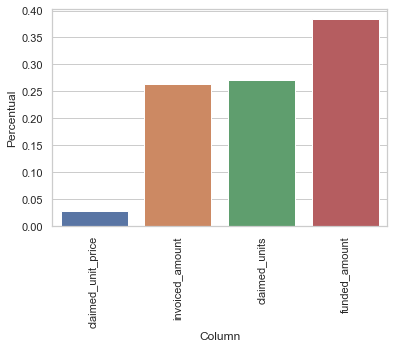

                    Percentual              Column
Name                                              
claimed_unit_price    0.027423  claimed_unit_price
invoiced_amount       0.263519     invoiced_amount
claimed_units         0.270803       claimed_units
funded_amount         0.384352       funded_amount
None


In [37]:
# Check if there any Nan Field
print(plotNaNValuesColums(invoices_claims_last_completed))

In [38]:
# Check some invoiced_amount and invoiced_amount NaN Data to
#  Check these data have in commum
df_invoiced_units_NaN = invoices_claims_last_completed.loc[invoices_claims_last_completed['funded_amount'].isna()]
df_invoiced_units_NaN

,invoiced_amount,claim_start_date,invoice_id,claimed_units,claim_id,claimed_unit_price,claim_end_date,claim_level2_key,claim_state,claim_level1_key,invoice_state,claim_level3_key,updated_at,funded_amount,member_id
106,1.00,2020-06-25,825,1.0,1081,1.00,2020-06-25,7d0af71b-f597-11e9-bfb4-022d4762bb3c,CANCELLED,58745466-f597-11e9-bfb4-022d4762bb3c,CANCELLED,2d001c6e-754f-11ea-ade9-022376bbb7c0,2021-04-06 17:41:23,NaN,21
895,386.24,2020-06-08,1724,8.0,2717,48.28,2020-06-08,7d0af71b-f597-11e9-bfb4-022d4762bb3c,CANCELLED,58745466-f597-11e9-bfb4-022d4762bb3c,CANCELLED,2d001d20-754f-11ea-ade9-022376bbb7c0,2021-04-06 17:50:24,NaN,262
18286,300.00,2020-05-23,19626,4.0,31479,75.00,2020-05-23,7d0af53b-f597-11e9-bfb4-022d4762bb3c,OPERATOR_REJECTED,58745466-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,2d002864-754f-11ea-ade9-022376bbb7c0,2021-04-06 17:54:51,NaN,658
18287,380.00,2020-05-24,19626,4.0,31480,95.00,2020-05-24,7d0af53b-f597-11e9-bfb4-022d4762bb3c,OPERATOR_REJECTED,58745466-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,2d00287d-754f-11ea-ade9-022376bbb7c0,2021-04-06 17:54:51,NaN,658
19351,249.96,2020-06-10,20911,4.0,33585,62.49,2020-06-12,7d0af53b-f597-11e9-bfb4-022d4762bb3c,CANCELLED,58745466-f597-11e9-bfb4-022d4762bb3c,CANCELLED,85e98f73-754f-11ea-ade9-022376bbb7c0,2021-04-06 17:59:05,NaN,1087
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231700,62.00,2021-03-08,495718,20.0,917898,3.10,2021-03-12,7d0af71b-f597-11e9-bfb4-022d4762bb3c,CANCELLED,58745466-f597-11e9-bfb4-022d4762bb3c,CANCELLED,2d001d52-754f-11ea-ade9-022376bbb7c0,2021-04-06 22:56:28,NaN,3549
231987,0.00,2021-03-11,499934,0.0,926602,55.47,2021-03-11,7d0af53b-f597-11e9-bfb4-022d4762bb3c,NOT_CLAIMABLE,58745466-f597-11e9-bfb4-022d4762bb3c,ALL_PAID,2d0032cb-754f-11ea-ade9-022376bbb7c0,2021-04-06 22:59:41,NaN,533
231992,98.60,2021-03-18,500343,2.0,927262,49.30,2021-03-18,7d0af71b-f597-11e9-bfb4-022d4762bb3c,MEMBER_REJECTED,58745466-f597-11e9-bfb4-022d4762bb3c,INVOICE_REJECTED,2d001d20-754f-11ea-ade9-022376bbb7c0,2021-04-06 22:59:59,NaN,359
232644,0.00,2021-03-16,511380,0.0,948762,55.47,2021-03-16,7d0af53b-f597-11e9-bfb4-022d4762bb3c,NOT_CLAIMABLE,58745466-f597-11e9-bfb4-022d4762bb3c,ALL_PAID,2d00284b-754f-11ea-ade9-022376bbb7c0,2021-04-06 23:08:26,NaN,533


In [39]:
df_null_funded_amount =  invoices_claims_last_completed[(invoices_claims_last_completed['funded_amount'].isna())
                                                      & (invoices_claims_last_completed['invoice_state'] == 'ALL_PAID')
                                                      & (invoices_claims_last_completed['claim_state'] == 'PAID')
                                                     ]

# Fixes The funded_amount NaN in invoice_state = ALL_PAID and claim_state = PAID
df_null_funded_amount['funded_amount'] = df_null_funded_amount['claimed_unit_price'].astype(float) * df_null_funded_amount['claimed_units'].astype(float)


invoices_claims_last_completed = invoices_claims_last_completed.set_index('claim_id')
invoices_claims_last_completed.update(df_null_funded_amount.set_index('claim_id'))
invoices_claims_last_completed.reset_index(inplace=True)    

In [40]:
# Group the state of invoice and claim of all null data
#  And Keeps these records
#   Because if 'funded_amount' is NaN means the claims is not PAID OR REFUNDED
df_invoiced_units_NaN[{"invoice_state"
                     , "claim_state"
                      }].groupby(["invoice_state"
                                , "claim_state"
                                 ]).count()

Empty DataFrame
Columns: []
Index: [(ALL_PAID, NOT_CLAIMABLE), (CANCELLED, CANCELLED), (INVOICE_REJECTED, MEMBER_REJECTED), (INVOICE_REJECTED, NOT_CLAIMABLE), (INVOICE_REJECTED, OPERATOR_REJECTED), (NOT_CLAIMABLE, NOT_CLAIMABLE), (PENDING_APPROVAL, PENDING_APPROVAL), (PENDING_REVIEW, CANCELLED)]

In [41]:
# As seeing above some invoices stated ALL_PAID and PAID are also funded_amount NaN
# Check The NaN fields
len(invoices_claims_last_completed[(invoices_claims_last_completed['funded_amount'].isna())
                                 & (invoices_claims_last_completed['invoice_state'] == 'ALL_PAID')
                                 & (invoices_claims_last_completed['claim_state'] == 'PAID')
                                ]
   )

0

In [42]:
invoices_claims_last_completed['updated_at'] = pd.to_datetime(invoices_claims_last_completed['updated_at']).dt.strftime('%Y-%m-%d')

In [43]:
# Group the invoices from their claims
invoices_claims_last_completed_cleased = invoices_claims_last_completed.groupby(["member_id"
                                                                               , "invoice_state"
                                                                               , "updated_at" 
                                                                               , "claim_state"
                                                                               , "claim_level1_key"
                                                                               , "claim_level2_key"
                                                                               , "claim_level3_key"]).agg({"invoiced_amount": "sum", "funded_amount": "sum"}).reset_index()

### Merge dataSets cleased

### Merges members dataSet with plans and budgets dataSet

In [44]:
# Member dataSet with plans and budgets dataSet
df_members_plans_budgets_merged = pd.merge(df_members_cleased, df_plans_budgets_cleased, on=["member_key", "member_key"])

### Merges last PLAN_DELIVERY_ACTIVED plan with members plans budgets merged dataSet

In [45]:
invoices_claims_plan_delivery_active = df_members_plans_budgets_merged.loc[(df_members_plans_budgets_merged['plan_status'] == 'PLAN_DELIVERY_ACTIVE')]

invoices_claims_plan_delivery_active = invoices_claims_plan_delivery_active.merge(invoices_claims_last_actived_cleased, on='member_id')

In [46]:
invoices_claims_plan_delivery_active = invoices_claims_plan_delivery_active[

   (
      (invoices_claims_plan_delivery_active.budget_level3_key == 'N/A')
    & (invoices_claims_plan_delivery_active.budget_level2_key == invoices_claims_plan_delivery_active.claim_level2_key)
    
   )

   |

   (
      (invoices_claims_plan_delivery_active.budget_level3_key != 'N/A')
    & (invoices_claims_plan_delivery_active.budget_level3_key == invoices_claims_plan_delivery_active.claim_level3_key)
    & (invoices_claims_plan_delivery_active.budget_level2_key == invoices_claims_plan_delivery_active.claim_level2_key)
    & (invoices_claims_plan_delivery_active.budget_level1_key == invoices_claims_plan_delivery_active.budget_level1_key)
   )

       
]

### Merges last COMPLETED plan with members plans budgets merged dataSet

In [47]:
invoices_claims_plan_completed = df_members_plans_budgets_merged.loc[(df_members_plans_budgets_merged['plan_status'] == 'COMPLETED')]

invoices_claims_plan_completed = invoices_claims_plan_completed.merge(invoices_claims_last_completed_cleased, on='member_id')

invoices_claims_plan_completed = invoices_claims_plan_completed[

   (
      (invoices_claims_plan_completed.budget_level3_key == 'N/A')
    & (invoices_claims_plan_completed.budget_level2_key == invoices_claims_plan_completed.claim_level2_key)
    
   )

   |

   (
      (invoices_claims_plan_completed.budget_level3_key != 'N/A')
    & (invoices_claims_plan_completed.budget_level3_key == invoices_claims_plan_completed.claim_level3_key)
    & (invoices_claims_plan_completed.budget_level2_key == invoices_claims_plan_completed.claim_level2_key)
    & (invoices_claims_plan_completed.budget_level1_key == invoices_claims_plan_completed.budget_level1_key)
   )
        
]

### Merges last COMPLETED plan dataSet with PLAN_DELIVERY_ACTIVED plan

In [48]:
frames = [invoices_claims_plan_delivery_active, invoices_claims_plan_completed]
invoices_claims_merged = pd.concat(frames)

In [49]:
invoices_claims_merged.rename(columns={'invoiced_amount':'requested_amount'
                                      } , inplace = True)

In [50]:
df_model = invoices_claims_merged.groupby(["member_key"
                                         , "updated_at"
                                         , "first_name"
                                         , "last_name"
                                         , "disabilities"
                                         , "SA1"
                                         , "price_zone_code"                                         
                                         , "plan_key"
                                         , "plan_status"
                                         , "plan_start_date"
                                         , "plan_end_date"                                                                               
                                         , "budget_level3_name"
                                         , "budget_level3_key"
                                         , "budget_level2_key"
                                         , "budget_level2_name"
                                         , "budget_level1_key"
                                         , "budget_level1_name"                                         
                                         , "invoice_state"
                                         , "claim_state"
                                         , "budget_amount"
                                          ]).agg({"requested_amount": "sum", "funded_amount": "sum"}).reset_index()                                                          

### MACHINE LEARNING

In [51]:
df_model = df_model.loc[ (df_model['plan_status'] == 'PLAN_DELIVERY_ACTIVE')]

In [52]:
## JUST FOR TEST
## JUST FOR TEST
df_model = df_model.loc[ (df_model['member_key'] == 'f8cdaaf0-c7f3-11ea-baa6-ebfe92aca975') | (df_model['member_key'] == 'a6c869c0-d220-11ea-b70a-d17e589b1829')]
## JUST FOR TEST
## JUST FOR TEST

In [53]:
# FUNDED AMOUNT
funded_amount_per_month = df_model

funded_amount_per_month = funded_amount_per_month.loc[df_model['updated_at'].between(df_model['plan_start_date'], date.today().strftime("%Y-%m-%d"), inclusive=True)].groupby(["member_key"
                                                                                                                                                                             , "updated_at"
                                                                                                                                                                             , "plan_start_date"
                                                                                                                                                                             , "plan_end_date"
                                                                                                                                                               ]).agg({"funded_amount": "sum"}).reset_index()

funded_amount_per_month['funded_year_month'] = pd.to_datetime(funded_amount_per_month['updated_at']).dt.strftime("%Y-%m")

funded_amount_per_month = funded_amount_per_month.groupby(['member_key'
                                                         , 'plan_start_date'
                                                         , 'funded_year_month'
                                                          ]).agg({"funded_amount": "sum"}).reset_index()

In [54]:
member_plan_start_And_end_date = df_model.groupby(["member_key", "plan_start_date", "plan_end_date"], as_index=False).count()
member_plan_start_And_end_date = member_plan_start_And_end_date[{"member_key", "plan_start_date", "plan_end_date"}]

In [55]:
df_dates_from_plan_start_date_TILL_plan_end_date = pd.DataFrame()

for index, row in member_plan_start_And_end_date.iterrows():

    Months = ((pd.to_datetime(row['plan_end_date']).year - pd.to_datetime(row['plan_start_date']).year) * 12) + (pd.to_datetime(row['plan_end_date']).month - pd.to_datetime(row['plan_start_date']).month  ) 

    df_serie_of_date_from_plan_start_date_TILL_plan_end_date = pd.DataFrame({'member_key': str(row['member_key'])
                                                                           , 'year_month':pd.date_range(row['plan_start_date']
                                                                                                      , row['plan_end_date'], freq='M')
                                                                           , 'sequencial':pd.Series(range(0, Months))})

    df_serie_of_date_from_plan_start_date_TILL_plan_end_date['year_month'] = df_serie_of_date_from_plan_start_date_TILL_plan_end_date['year_month'].dt.strftime("%Y-%m")
                
    df_dates_from_plan_start_date_TILL_plan_end_date = pd.concat([df_dates_from_plan_start_date_TILL_plan_end_date
                                                                , df_serie_of_date_from_plan_start_date_TILL_plan_end_date]
                                                                , axis=0)    

In [56]:
budget_amount_per_member = df_model

budget_amount_per_member['total_of_months'] = ((pd.to_datetime(budget_amount_per_member['plan_end_date']).dt.year
                                              -  pd.to_datetime(budget_amount_per_member['plan_start_date']).dt.year) * 12)                                                                                                                                        + (pd.to_datetime(budget_amount_per_member['plan_end_date']).dt.month                                                                                                                                                -  pd.to_datetime(budget_amount_per_member['plan_start_date']).dt.month)

budget_amount_per_member['ideal_amount_per_month'] = (budget_amount_per_member['budget_amount']
                                                    / budget_amount_per_member['total_of_months']).round(decimals=3)

budget_amount_per_member.rename(columns={'budget_amount':'budget_amount_total'                               
                                        } , inplace = True
                                )

budget_amount_per_member['plan_start_year_month'] = pd.to_datetime(budget_amount_per_member['plan_start_date']).dt.strftime("%Y-%m")
budget_amount_per_member['plan_end_year_month'] = pd.to_datetime(budget_amount_per_member['plan_end_date']).dt.strftime("%Y-%m")

budget_amount_per_member = budget_amount_per_member.groupby(['member_key'                                                         
                                                           , 'plan_start_year_month'
                                                           , 'plan_end_year_month'
                                                            ]).agg({"ideal_amount_per_month": "sum", "budget_amount_total": "sum"}).reset_index()

In [57]:
## JUST FOR TEST
## JUST FOR TEST
funded_amount_per_month.iloc[1,2] = '2020-10'
funded_amount_per_month.iloc[2,0] = 'a6c869c0-d220-11ea-b70a-d17e589b1829'
funded_amount_per_month.iloc[2,2] = '2020-09'
funded_amount_per_month.iloc[2,1] = '2020-08-12'
funded_amount_per_month.iloc[2,3] = 999999.99
funded_amount_per_month
## JUST FOR TEST
## JUST FOR TEST

,member_key,plan_start_date,funded_year_month,funded_amount
0,a6c869c0-d220-11ea-b70a-d17e589b1829,2020-08-12,2020-11,53655.15
1,a6c869c0-d220-11ea-b70a-d17e589b1829,2020-08-12,2020-10,104456.61
2,a6c869c0-d220-11ea-b70a-d17e589b1829,2020-08-12,2020-09,999999.99


In [58]:
funded_amount_previous_month = funded_amount_per_month[{'member_key'
                                                      , 'funded_year_month'
                                                      , 'funded_amount'
                                                      }]

funded_amount_previous_month.rename(columns={'funded_amount':'funded_amount_previous_month'
                                           , 'funded_year_month':'funded_year_month_previous_month'
                                            } , inplace = True)  

C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [59]:
funded_amount_merged = pd.merge(funded_amount_per_month, funded_amount_previous_month, how="left", on=["member_key", "member_key"])
funded_amount_merged = funded_amount_merged.drop(labels=["plan_start_date"], axis=1)

funded_amount_merged = funded_amount_merged.loc[(funded_amount_merged['member_key'] == funded_amount_merged['member_key'])
                          &
                         (funded_amount_merged['funded_year_month'] >= funded_amount_merged['funded_year_month_previous_month'])]                                                                                                                               .groupby(['member_key'
                                                   , 'funded_amount'
                                                   ,'funded_year_month'])                                                                                                                                                                                       .agg({"funded_amount_previous_month": "sum"}).reset_index()

funded_amount_merged.rename(columns={'funded_amount_previous_month':'funded_amount_total'
                                    } , inplace = True)

In [60]:
maximums_1 = funded_amount_merged.groupby(['member_key'])

maximums_previous_total = maximums_1.agg(funded_year_month=('funded_year_month', np.max)
                                       , maximums_funded_amount_total=('funded_amount_total', np.max)
                          )      

In [61]:
## JUST FOR TEST
## JUST FOR TEST
budget_amount_per_member
## JUST FOR TEST
## JUST FOR TEST

,member_key,plan_start_year_month,plan_end_year_month,ideal_amount_per_month,budget_amount_total
0,a6c869c0-d220-11ea-b70a-d17e589b1829,2020-08,2022-08,268016.366,6432392.82
1,f8cdaaf0-c7f3-11ea-baa6-ebfe92aca975,2020-08,2021-08,508362.486,6100349.88


### Merge

### aaaaaaaaaaaaaaaaaaaaa #######################################

In [62]:
# MERGE THEM
models_merged_1 = pd.merge(df_dates_from_plan_start_date_TILL_plan_end_date, funded_amount_merged, how='left', left_on=['member_key','year_month'], right_on = ['member_key','funded_year_month'])

models_merged_2 = models_merged_1.merge(maximums_previous_total, on='member_key')

models_merged_2['funded_amount_total'].loc[models_merged_2['year_month']
                                           >
                                           models_merged_2['funded_year_month_y']] = models_merged_2['maximums_funded_amount_total']                                                                                 

C:\Users\dttt1\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [63]:
models_merged_3 = models_merged_2.merge(budget_amount_per_member, on='member_key')

models_merged_3 = models_merged_3.replace(np.NaN, 0)

models_merged_3['amount_per_month'] = models_merged_3['ideal_amount_per_month'] * (models_merged_3['sequencial'] + 1)

# UNDER
models_merged_3['over_under_track'] = np.where(((models_merged_3['amount_per_month'] - models_merged_3['funded_amount']) >= 0), 0, 1)

# UNDER
#models_merged_3['over_under_track'] = np.where((models_merged_3['over_under_track'] == 'x') & ((models_merged_3['amount_per_month'] - models_merged_3['funded_amount_total']) >= 0), 1, models_merged_3['over_under_track'])

# TRACK
#models_merged_3['over_under_track'] = np.where((models_merged_3['over_under_track'] == 'y') & ((models_merged_3['amount_per_month'] - models_merged_3['funded_amount_total']) == 0), 2, models_merged_3#['over_under_track'])

df_model_ML = models_merged_3[{'member_key'
                             , 'year_month'
                             , 'funded_amount'
                             , 'amount_per_month'
                             , 'over_under_track'}]

df_model_ML                             

,over_under_track,year_month,funded_amount,member_key,amount_per_month
0,0,2020-08,0.00,a6c869c0-d220-11ea-b70a-d17e589b1829,268016.366
1,1,2020-09,999999.99,a6c869c0-d220-11ea-b70a-d17e589b1829,536032.732
2,0,2020-10,104456.61,a6c869c0-d220-11ea-b70a-d17e589b1829,804049.098
3,0,2020-11,53655.15,a6c869c0-d220-11ea-b70a-d17e589b1829,1072065.464
4,0,2020-12,0.00,a6c869c0-d220-11ea-b70a-d17e589b1829,1340081.830
5,0,2021-01,0.00,a6c869c0-d220-11ea-b70a-d17e589b1829,1608098.196
6,0,2021-02,0.00,a6c869c0-d220-11ea-b70a-d17e589b1829,1876114.562
7,0,2021-03,0.00,a6c869c0-d220-11ea-b70a-d17e589b1829,2144130.928
8,0,2021-04,0.00,a6c869c0-d220-11ea-b70a-d17e589b1829,2412147.294
9,0,2021-05,0.00,a6c869c0-d220-11ea-b70a-d17e589b1829,2680163.660


In [79]:
df_sigmoid = df_model_ML[{'funded_amount'
                        , 'amount_per_month'
                        , 'over_under_track'}]

#df_sigmoid = df_sigmoid.loc[ df_sigmoid['funded_amount'] >0 ]
df_sigmoid

,over_under_track,amount_per_month,funded_amount
0,0,268016.366,0.00
1,1,536032.732,999999.99
2,0,804049.098,104456.61
3,0,1072065.464,53655.15
4,0,1340081.830,0.00
5,0,1608098.196,0.00
6,0,1876114.562,0.00
7,0,2144130.928,0.00
8,0,2412147.294,0.00
9,0,2680163.660,0.00


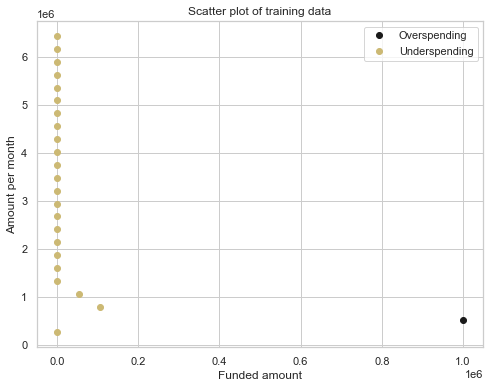

In [88]:
plt.figure(figsize=(8, 6))
plt.xlabel('Funded amount')
plt.ylabel('Amount per month')

plt.title('Scatter plot of training data')
plt.plot(df_sigmoid['funded_amount'][df_sigmoid['over_under_track']==1],
         df_sigmoid['amount_per_month'][df_sigmoid['over_under_track']==1], 'ko',
         label='Overspending')

plt.plot(df_sigmoid['funded_amount'][df_sigmoid['over_under_track']==0],
         df_sigmoid['amount_per_month'][df_sigmoid['over_under_track']==0], 'yo',
         label='Underspending')
plt.legend()

In [72]:
#xMin = df_sigmoid['funded_amount'].min().astype(int)
xMin = 0
xMax = df_sigmoid['funded_amount'].max().astype(int)

yMin = df_sigmoid['amount_per_month'].min().astype(int)
yMax = df_sigmoid['amount_per_month'].max().astype(int)

In [75]:
# linespace generate an array from start and stop value, 100 elements
values = plt.linspace(xMin, xMax, 1000)

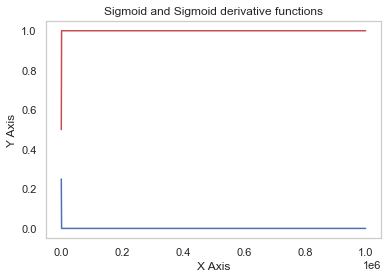

In [76]:
# prepare the plot, associate the color r(ed) or b(lue) and the label 
plt.plot(values, sigmoid(values), 'r')
plt.plot(values, sigmoid_derivative(values), 'b')

# Draw the grid line in background.
plt.grid()

# Title & Subtitle
plt.title('Sigmoid and Sigmoid derivative functions')

# plt.plot(x)
plt.xlabel('X Axis')
plt.ylabel('Y Axis')

# create the graph
plt.show()